# ETS (ERROR, TREND AND SEASONALITY) MODELS

### Reading the csv file

In [4]:
df.head()

,Datetime,Count
0,2012-08-25,3.166667
1,2012-08-26,3.666667
2,2012-08-27,2.583333
3,2012-08-28,2.416667
4,2012-08-29,2.500000


### Splitting the data into train and test using (you can use any one of them) :-

# MODELS

### 1) Single Exponential Smoothing Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Evaluation metric results:-
MSE is : 2078.964295092398
MAE is : 38.31823479231623
RMSE is : 45.59566092395633
MAPE is : 27.24499833176115
R2 is : -0.09958771177913528

None
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  444
Model:             SimpleExpSmoothing   SSE                         231248.076
Optimized:                       True   AIC                           2781.407
Trend:                           None   BIC                           2789.599
Seasonal:                        None   AICC                          2781.498
Seasonal Periods:                None   Date:                 Thu, 30 Sep 2021
Box-Cox:                        False   Time:                         21:40:55
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
-------------------------------------

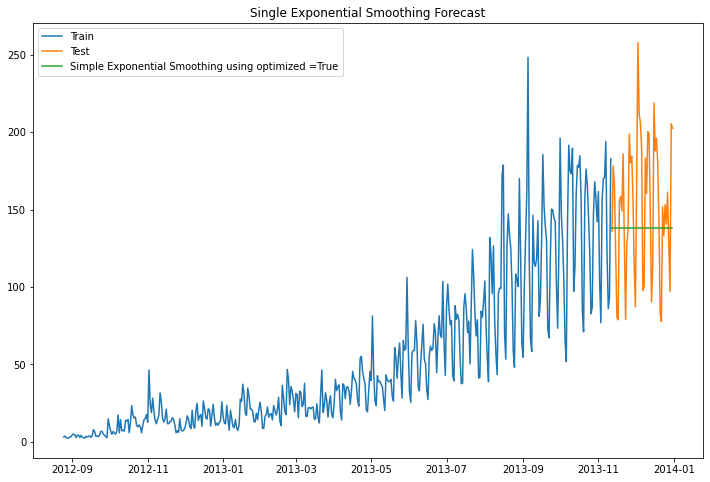

In [8]:
# Fitting and forecasting a simple exponential model
fitSESauto = SimpleExpSmoothing(np.asarray(train[time_dependent_variable])).fit(optimized= True)
pred = fitSESauto.forecast(len(test))

# Different metrics for evaluating the model
print(timeseries_evaluation_metrics_func(test[time_dependent_variable],pred))
print(fitSESauto.summary())

# Creating a column for forecasts for plotting
y_hat = test.copy()
index = [i for i in range(len(train),len(df))]    
pred = pd.Series(pred,index=index)
y_hat["pred"] = pred

# Plotting a graph showing results
plt.figure(figsize=(12,8))
plt.plot(train[time_column], train[time_dependent_variable], label='Train')
plt.plot(test[time_column],test[time_dependent_variable], label='Test')
plt.plot(y_hat[time_column],y_hat['pred'], label='Simple Exponential Smoothing using optimized =True')
plt.legend(loc='best')
plt.title("Single Exponential Smoothing Forecast")
plt.show()

### 2) Double Exponential Smoothing Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Evaluation metric results:-
MSE is : 1887.680824269814
MAE is : 36.116056391307524
RMSE is : 43.44744899611269
MAPE is : 28.893597445429887
R2 is : 0.0015842777925414442

None
                              Holt Model Results                              
Dep. Variable:                  Count   No. Observations:                  444
Model:                           Holt   SSE                         222538.989
Optimized:                       True   AIC                           2768.363
Trend:                       Additive   BIC                           2784.746
Seasonal:                        None   AICC                          2768.555
Seasonal Periods:                None   Date:                 Thu, 30 Sep 2021
Box-Cox:                        False   Time:                         21:40:55
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
----------------------------------

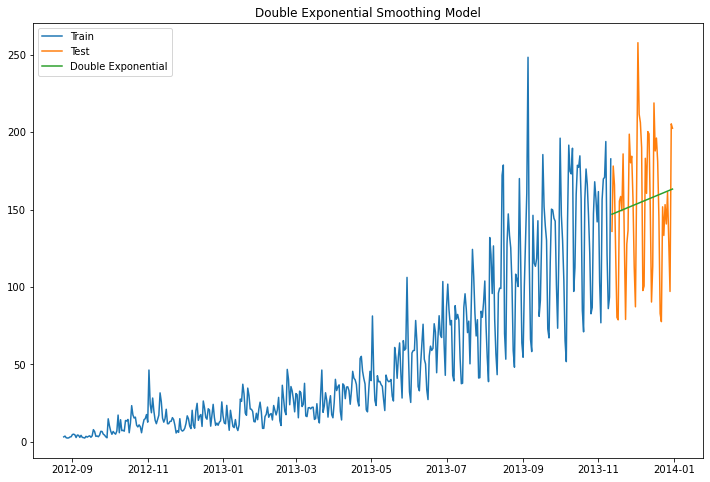

In [9]:
# Fitting and forecasting a double exponential model
fitESauto = Holt(train[time_dependent_variable]).fit(optimized= True, use_brute = True)
pred = fitESauto.forecast(len(test))

# Different metrics for evaluating the model
print(timeseries_evaluation_metrics_func(test[time_dependent_variable],pred))
print(fitESauto.summary())

# Creating a column for forecasts for plotting
y_hat = test.copy()
index = [i for i in range(len(train),len(df))]    
pred = pd.Series(pred,index=index)
y_hat["pred"] = pred

# Plotting a graph showing results
plt.figure(figsize=(12,8))
plt.plot(train[time_column], train[time_dependent_variable], label='Train')
plt.plot(test[time_column],test[time_dependent_variable], label='Test')
plt.plot(y_hat[time_column],y_hat['pred'], label='Double Exponential')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing Model")
plt.show()

### 3) Triple Exponential Smoothing Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Evaluation metric results:-
MSE is : 3373.6828823342235
MAE is : 45.26243649480226
RMSE is : 58.08341314294661
MAPE is : 40.152196119224406
R2 is : -0.7843790052630284

None
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Count   No. Observations:                  444
Model:             ExponentialSmoothing   SSE                         240614.070
Optimized:                         True   AIC                           2827.035
Trend:                   Multiplicative   BIC                           2892.569
Seasonal:                Multiplicative   AICC                          2828.645
Seasonal Periods:                    12   Date:                 Thu, 30 Sep 2021
Box-Cox:                          False   Time:                         21:40:56
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------

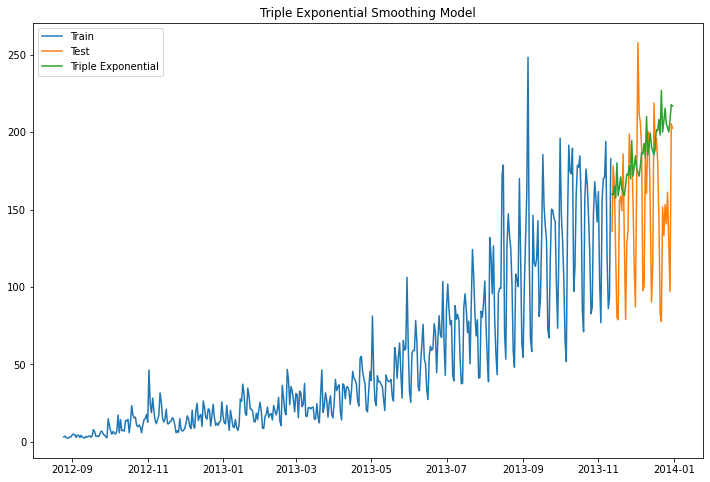

In [10]:
# Fitting and forecasting a triple exponential model. Trend and seasonality can be additive or multiplicative
fitESauto = ExponentialSmoothing(train[time_dependent_variable],trend='mul',seasonal='mul',seasonal_periods=12).fit()
pred = fitESauto.forecast(len(test))

# Different metrics for evaluating the model
print(timeseries_evaluation_metrics_func(test[time_dependent_variable],pred))
print(fitESauto.summary())

# Creating a column for forecasts for plotting
y_hat = test.copy()
index = [i for i in range(len(train),len(df))]    
pred = pd.Series(pred,index=index)
y_hat["pred"] = pred

# Plotting a graph showing results
plt.figure(figsize=(12,8))
plt.plot(train[time_column], train[time_dependent_variable], label='Train')
plt.plot(test[time_column],test[time_dependent_variable], label='Test')
plt.plot(y_hat[time_column],y_hat['pred'], label='Triple Exponential')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing Model")
plt.show()

### 4) Theta Model

This model is famous because of its simplicity and success in performing the best in solving M4 forecasting challenge.
The model is implemented in the following steps:

- Test for seasonality
- Deseasonalize if seasonality detected
- Estimate alpha (SES) by fitting a SES model to the data and beta by OLS.
- Forecast the series
- Reseasonalize if the data was deseasonalized.

This model uses SES and Simple OLS. For more information, https://www.statsmodels.org/stable/examples/notebooks/generated/theta-model.html  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


Evaluation metric results:-
MSE is : 1892.5705877024543
MAE is : 35.043844662752
RMSE is : 43.503684760057446
MAPE is : 26.763023682628656
R2 is : -0.0010019733502659722

None
                              ThetaModel Results                              
Dep. Variable:                  Count   No. Observations:                  444
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Thu, 30 Sep 2021   Deseas. Method:         Multiplicative
Time:                        21:40:56   Period:                              7
Sample:                    08-25-2012                                         
                         - 11-11-2013                                         
   Parameter Estimates   
           Parameters    
-------------------------
b0    0.31531805087789383
alpha 0.16618963976011414
-------------------------


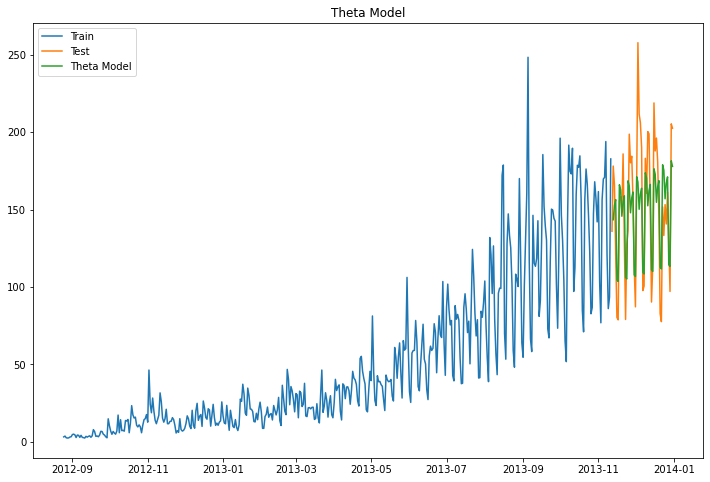

In [11]:
# Make sure that your time_column must be your index column, otherwise it will give an error.
train.index = train[time_column]

# Fitting the model
fitESauto = ThetaModel(train[time_dependent_variable]).fit()
pred = fitESauto.forecast(len(test),theta=np.inf)

# Different metrics for evaluating the model
print(timeseries_evaluation_metrics_func(test[time_dependent_variable],pred))
print(fitESauto.summary())

# Creating a column for forecasts for plotting
y_hat = test.copy()
index = [i for i in range(len(train),len(df))]    
pred = pd.Series(pred,index=index)
y_hat["pred"] = pred

# Plotting a graph showing results
plt.figure(figsize=(12,8))
plt.plot(train[time_column], train[time_dependent_variable], label='Train')
plt.plot(test[time_column],test[time_dependent_variable], label='Test')
plt.plot(y_hat[time_column],y_hat['pred'], label='Theta Model')
plt.legend(loc='best')
plt.title("Theta Model")
plt.show()